In [1]:
import numpy as np
import pandas as pd

In [83]:
path_loan_outcomes = "loan_outcomes.csv"
loan_outcomes = pd.read_csv(path_loan_outcomes)
loan_outcomes.head(10)

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid
5,6,2018-02-25 14:43:24.000000,defaulted
6,7,2016-07-11 14:07:46.202826,repaid
7,8,2017-02-20 16:22:44.000000,defaulted
8,9,2018-01-03 16:21:38.000000,defaulted
9,10,2018-02-01 11:24:01.000000,repaid


In [132]:
path_user_gps_fixes = "user_gps_fixes.csv"
user_gps_fixes = pd.read_csv(path_user_gps_fixes)
user_gps_fixes.head(10)

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.400,0.0,0.0,fused,1
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.000,0.0,0.0,fused,1
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.400,0.0,0.0,fused,1
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.000,0.0,0.0,fused,1
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.000,0.0,0.0,fused,1
5,2017-02-04 08:12:06,2017-02-04 08:12:32,36.878682,-1.320253,19.182,0.0,0.0,fused,1
6,2017-06-21 17:21:50,2017-06-21 17:21:55,36.902483,-1.289388,1700.000,0.0,0.0,fused,1
7,2017-06-20 10:08:35,2017-06-20 10:29:33,36.885694,-1.308045,1386.000,0.0,0.0,fused,1
8,2017-05-24 04:52:31,2017-05-24 05:17:26,36.880287,-1.289266,9.900,201.4,0.0,fused,1
9,2017-06-17 09:44:34,2017-06-17 09:45:02,36.857881,-1.315075,30.000,0.0,0.0,fused,1


In [85]:
path_user_attributes = "user_attributes.csv"
user_attributes = pd.read_csv(path_user_attributes)
user_attributes.head(10)

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53
5,6,42,9305.85
6,7,28,2726.06
7,8,25,6530.59
8,9,25,1715.96
9,10,34,9260.69


In [ ]:
################# EDA 1 ######################## 


In [133]:
################. Transformation of geo-coordinates by removal of decimal points; losing precision here #######
##### Reason highlighted in the report ###########

import math
# UDF

def calculate_status(row):
    x = float(row['longitude'])
    y = float(row['latitude'])
    b = 2000.0
    b2 = 2000.0
    if x is not None: 
        a,b = math.modf(x)
    if y is not None: 
        a2,b2 = math.modf(y)
    return [b,b2]
    
user_gps_fixes['long_lat'] =  user_gps_fixes.apply(calculate_status, axis=1)

user_gps_fixes.head(10)


,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id,long_lat
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.400,0.0,0.0,fused,1,"[36.0, -1.0]"
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.000,0.0,0.0,fused,1,"[36.0, -1.0]"
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.400,0.0,0.0,fused,1,"[36.0, -1.0]"
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.000,0.0,0.0,fused,1,"[36.0, -1.0]"
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.000,0.0,0.0,fused,1,"[36.0, -1.0]"
5,2017-02-04 08:12:06,2017-02-04 08:12:32,36.878682,-1.320253,19.182,0.0,0.0,fused,1,"[36.0, -1.0]"
6,2017-06-21 17:21:50,2017-06-21 17:21:55,36.902483,-1.289388,1700.000,0.0,0.0,fused,1,"[36.0, -1.0]"
7,2017-06-20 10:08:35,2017-06-20 10:29:33,36.885694,-1.308045,1386.000,0.0,0.0,fused,1,"[36.0, -1.0]"
8,2017-05-24 04:52:31,2017-05-24 05:17:26,36.880287,-1.289266,9.900,201.4,0.0,fused,1,"[36.0, -1.0]"
9,2017-06-17 09:44:34,2017-06-17 09:45:02,36.857881,-1.315075,30.000,0.0,0.0,fused,1,"[36.0, -1.0]"


In [134]:
######################## Grouping by information against each user by collecting longitude, latitude 
## and location provider info as list ################

pct = lambda x: list(x)
pct2 = lambda x: len(x)
aggs = {'long_lat':pct, 'location_provider': pct, 'altitude': pct2}
user_gps_fixes = user_gps_fixes.groupby('user_id').agg(aggs)

user_gps_fixes.rename({'altitude': 'Frequency_gps_points'}, axis=1, inplace=True)

user_gps_fixes.head(10)

,long_lat,location_provider,Frequency_gps_points
user_id,,,
1,"[[36.0, -1.0], [36.0, -1.0], [36.0, -1.0], [36...","[fused, fused, fused, fused, fused, fused, fus...",70.0
2,"[[36.0, -1.0], [36.0, -1.0], [36.0, -1.0], [40...","[fused, fused, fused, gps, fused, fused, gps, ...",10.0
3,"[[35.0, -0.0]]",[gps],1.0
4,"[[36.0, -0.0], [36.0, -0.0]]","[fused, fused]",2.0
5,"[[-73.0, 41.0], [-73.0, 41.0], [36.0, -1.0], [...","[fused, fused, fused, fused, gps, fused, fused...",9.0
6,"[[34.0, -0.0], [34.0, 0.0], [34.0, 0.0], [34.0...","[fused, fused, fused, fused, fused, fused, fus...",29.0
8,"[[34.0, -0.0], [34.0, -0.0], [34.0, -0.0], [34...","[fused, network, network, network, network, ne...",274.0
9,"[[36.0, -1.0], [36.0, -1.0], [36.0, -1.0], [36...","[fused, gps, fused, fused, fused, gps, fused, ...",22.0
10,"[[34.0, 0.0], [34.0, 0.0], [34.0, 0.0], [34.0,...","[fused, fused, fused, fused, fused, fused, fus...",39.0


In [135]:
############### Extracting the datapoint with the maximum occurence for longitude, latitude 
## and location provider  ##########

from collections import defaultdict
import operator 

from collections import Counter


def calculate_maxoccurence(row):
    list_temp = row['location_provider']
    return Counter(list_temp).most_common(1)[0][0]
    

def calculate_maxoccurence_list_of_list(row):
    temp_dict = defaultdict(int)
    list_temp = row['long_lat']
    hash_values = {}
    for e_ in list_temp:
        key_val = int(e_[0] + e_[1]*100 + 9000)
        temp_dict[key_val] += 1
        hash_values[key_val] = e_
    return hash_values[max(temp_dict.items(), key=operator.itemgetter(1))[0]]



user_gps_fixes['most_long_lat'] =  user_gps_fixes.apply(calculate_maxoccurence_list_of_list, axis=1)
user_gps_fixes['most_loc_provider'] =  user_gps_fixes.apply(calculate_maxoccurence, axis=1)

user_gps_fixes[['most_long_1','most_lat_1']] = pd.DataFrame(user_gps_fixes.most_long_lat.tolist(), index= user_gps_fixes.index)
user_gps_fixes = user_gps_fixes[[ "most_long_lat","most_loc_provider", "most_long_1", "most_lat_1", "Frequency_gps_points"]]
user_gps_fixes.head(10)


,most_long_lat,most_loc_provider,most_long_1,most_lat_1,Frequency_gps_points
user_id,,,,,
1,"[36.0, -1.0]",fused,36.0,-1.0,70.0
2,"[36.0, -1.0]",fused,36.0,-1.0,10.0
3,"[35.0, -0.0]",gps,35.0,-0.0,1.0
4,"[36.0, -0.0]",fused,36.0,-0.0,2.0
5,"[36.0, -1.0]",fused,36.0,-1.0,9.0
6,"[34.0, -0.0]",fused,34.0,-0.0,29.0
8,"[34.0, -0.0]",network,34.0,-0.0,274.0
9,"[36.0, -1.0]",gps,36.0,-1.0,22.0
10,"[34.0, 0.0]",fused,34.0,0.0,39.0


In [136]:
# Join with the loan_outcomes DF

user_gps_loan_outcome = pd.concat([user_gps_fixes, loan_outcomes], axis=1, join='inner')
user_gps_loan_outcome.head(1)


,most_long_lat,most_loc_provider,most_long_1,most_lat_1,Frequency_gps_points,user_id,application_at,loan_outcome
1,"[36.0, -1.0]",fused,36.0,-1.0,70.0,2,2016-05-17 10:10:12.447976,repaid


In [137]:
print ("most_long_1", user_gps_loan_outcome['most_long_1'].unique())
print ("most_lat_1", user_gps_loan_outcome['most_lat_1'].unique())
# print ("most_long_lat", user_gps_loan_outcome['most_long_lat'].unique())


most_long_1 [ 36.  35.  34.  39.  37. -13.  40.  38.  42.]
most_lat_1 [-1. -0. -4. -3.  8.  1. -2.]


In [104]:
############ Assigning categories to longitude and latitude values ################

cleanup_nums = {"most_long_1":     {36.0 : "A", 35.0 : "B", 35.0 : "C", 34.0 : "D", 39.0 : "E", 37.0 : "F", 
                                    -13.0 : "G",  40.0 : "H",  38.0: "I" , 42.0 : "J"},
                "most_lat_1" : {-1.0 : "A", -0.0: "B", -4.0: "C", -3.0: "D", 8.0 : "E", 1.0: "F", -2.0: "G"}
               }


user_gps_loan_outcome.replace(cleanup_nums, inplace=True)


user_gps_loan_outcome.head(10)

,most_long_lat,most_loc_provider,most_long_1,most_lat_1,Frequency_gps_points,user_id,application_at,loan_outcome
1,"[36.0, -1.0]",fused,A,A,70.0,2,2016-05-17 10:10:12.447976,repaid
2,"[36.0, -1.0]",fused,A,A,10.0,3,2016-10-20 10:07:20.459081,defaulted
3,"[35.0, -0.0]",gps,C,B,1.0,4,2017-01-13 13:03:34.000000,defaulted
4,"[36.0, -0.0]",fused,A,B,2.0,5,2016-11-03 15:41:39.124610,repaid
5,"[36.0, -1.0]",fused,A,A,9.0,6,2018-02-25 14:43:24.000000,defaulted
6,"[34.0, -0.0]",fused,D,B,29.0,7,2016-07-11 14:07:46.202826,repaid
8,"[34.0, -0.0]",network,D,B,274.0,9,2018-01-03 16:21:38.000000,defaulted
9,"[36.0, -1.0]",gps,A,A,22.0,10,2018-02-01 11:24:01.000000,repaid
10,"[34.0, 0.0]",fused,D,B,39.0,11,2017-01-31 06:06:29.000000,repaid
11,"[36.0, -1.0]",fused,A,A,4.0,12,2018-08-04 03:05:50.000000,repaid


In [105]:
########## Dropping some columns #######
user_gps_loan_outcome.count()
user_gps_loan_outcome=user_gps_loan_outcome.drop(columns=['most_long_lat', 'application_at'])
user_gps_loan_outcome.head(10)

,most_loc_provider,most_long_1,most_lat_1,Frequency_gps_points,user_id,loan_outcome
1,fused,A,A,70.0,2,repaid
2,fused,A,A,10.0,3,defaulted
3,gps,C,B,1.0,4,defaulted
4,fused,A,B,2.0,5,repaid
5,fused,A,A,9.0,6,defaulted
6,fused,D,B,29.0,7,repaid
8,network,D,B,274.0,9,defaulted
9,gps,A,A,22.0,10,repaid
10,fused,D,B,39.0,11,repaid
11,fused,A,A,4.0,12,repaid


In [106]:
########## Generating pandas profiling report #######

import pandas_profiling

profile = user_gps_loan_outcome.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Branch_profiling_report_1.html")

In [ ]:
##################### EDA 2 #######################

In [2]:
path_loan_outcomes = "loan_outcomes.csv"
loan_outcomes = pd.read_csv(path_loan_outcomes)
loan_outcomes.head(10)

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000000,defaulted
1,2,2016-05-17 10:10:12.447976,repaid
2,3,2016-10-20 10:07:20.459081,defaulted
3,4,2017-01-13 13:03:34.000000,defaulted
4,5,2016-11-03 15:41:39.124610,repaid
5,6,2018-02-25 14:43:24.000000,defaulted
6,7,2016-07-11 14:07:46.202826,repaid
7,8,2017-02-20 16:22:44.000000,defaulted
8,9,2018-01-03 16:21:38.000000,defaulted
9,10,2018-02-01 11:24:01.000000,repaid


In [3]:
loan_outcomes.count()

user_id           400
application_at    400
loan_outcome      400
dtype: int64

In [4]:
path_user_gps_fixes = "user_gps_fixes.csv"
user_gps_fixes = pd.read_csv(path_user_gps_fixes)
user_gps_fixes.head(10)

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.400,0.0,0.0,fused,1
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.000,0.0,0.0,fused,1
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.400,0.0,0.0,fused,1
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.000,0.0,0.0,fused,1
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.000,0.0,0.0,fused,1
5,2017-02-04 08:12:06,2017-02-04 08:12:32,36.878682,-1.320253,19.182,0.0,0.0,fused,1
6,2017-06-21 17:21:50,2017-06-21 17:21:55,36.902483,-1.289388,1700.000,0.0,0.0,fused,1
7,2017-06-20 10:08:35,2017-06-20 10:29:33,36.885694,-1.308045,1386.000,0.0,0.0,fused,1
8,2017-05-24 04:52:31,2017-05-24 05:17:26,36.880287,-1.289266,9.900,201.4,0.0,fused,1
9,2017-06-17 09:44:34,2017-06-17 09:45:02,36.857881,-1.315075,30.000,0.0,0.0,fused,1


In [5]:
################. Transformation of geo-coordinates by removal of decimal points; losing precision here #######
##### Reason highlighted in the report ###########

import math

def calculate_status(row):
    x = float(row['longitude'])
    y = float(row['latitude'])
    b = 2000.0
    b2 = 2000.0
    if x is not None: 
        a,b = math.modf(x)
    if y is not None: 
        a2,b2 = math.modf(y)
    return [b,b2]

user_gps_fixes['long_lat'] =  user_gps_fixes.apply(calculate_status, axis=1)

user_gps_fixes.head(10)

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id,long_lat
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.400,0.0,0.0,fused,1,"[36.0, -1.0]"
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.000,0.0,0.0,fused,1,"[36.0, -1.0]"
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.400,0.0,0.0,fused,1,"[36.0, -1.0]"
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.000,0.0,0.0,fused,1,"[36.0, -1.0]"
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.000,0.0,0.0,fused,1,"[36.0, -1.0]"
5,2017-02-04 08:12:06,2017-02-04 08:12:32,36.878682,-1.320253,19.182,0.0,0.0,fused,1,"[36.0, -1.0]"
6,2017-06-21 17:21:50,2017-06-21 17:21:55,36.902483,-1.289388,1700.000,0.0,0.0,fused,1,"[36.0, -1.0]"
7,2017-06-20 10:08:35,2017-06-20 10:29:33,36.885694,-1.308045,1386.000,0.0,0.0,fused,1,"[36.0, -1.0]"
8,2017-05-24 04:52:31,2017-05-24 05:17:26,36.880287,-1.289266,9.900,201.4,0.0,fused,1,"[36.0, -1.0]"
9,2017-06-17 09:44:34,2017-06-17 09:45:02,36.857881,-1.315075,30.000,0.0,0.0,fused,1,"[36.0, -1.0]"


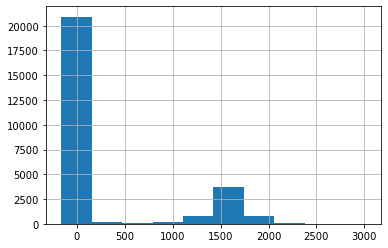

In [6]:
user_gps_fixes["altitude"].hist()

In [7]:
########### Categorising altitude information into buckets of low and high #########

def categoriseAltitude(x):
    cat = "High"
    if x < 500.0:
        cat = "Low"
    return cat

    
user_gps_fixes['altitude_revised'] =  user_gps_fixes["altitude"].apply(categoriseAltitude)
user_gps_fixes.head(10)

,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id,long_lat,altitude_revised
0,2017-06-22 09:37:20,2017-06-22 09:43:42,36.840540,-1.294342,68.400,0.0,0.0,fused,1,"[36.0, -1.0]",Low
1,2017-08-14 07:50:27,2017-08-14 09:05:27,36.895270,-1.341928,1409.000,0.0,0.0,fused,1,"[36.0, -1.0]",Low
2,2017-06-13 10:34:29,2017-06-13 10:54:48,36.811903,-1.307220,68.400,0.0,0.0,fused,1,"[36.0, -1.0]",Low
3,2017-06-18 12:16:20,2017-06-18 12:16:24,36.907049,-1.309984,1581.000,0.0,0.0,fused,1,"[36.0, -1.0]",Low
4,2017-06-28 09:39:08,2017-06-28 09:58:12,36.839396,-1.280310,1396.000,0.0,0.0,fused,1,"[36.0, -1.0]",Low
5,2017-02-04 08:12:06,2017-02-04 08:12:32,36.878682,-1.320253,19.182,0.0,0.0,fused,1,"[36.0, -1.0]",Low
6,2017-06-21 17:21:50,2017-06-21 17:21:55,36.902483,-1.289388,1700.000,0.0,0.0,fused,1,"[36.0, -1.0]",Low
7,2017-06-20 10:08:35,2017-06-20 10:29:33,36.885694,-1.308045,1386.000,0.0,0.0,fused,1,"[36.0, -1.0]",Low
8,2017-05-24 04:52:31,2017-05-24 05:17:26,36.880287,-1.289266,9.900,201.4,0.0,fused,1,"[36.0, -1.0]",Low
9,2017-06-17 09:44:34,2017-06-17 09:45:02,36.857881,-1.315075,30.000,0.0,0.0,fused,1,"[36.0, -1.0]",Low


In [8]:
######################## Grouping by information against each user by collecting longitude, latitude 
## and location provider info as list ################

pct = lambda x: list(x)
pct2 = lambda x: len(x)
aggs = {'long_lat':pct, 'location_provider': pct, 'altitude': pct2, 'altitude_revised' : pct}
user_gps_fixes = user_gps_fixes.groupby('user_id').agg(aggs)
user_gps_fixes.rename({'altitude': 'Frequency_gps_points'}, axis=1, inplace=True)

user_gps_fixes.head(10)


,long_lat,location_provider,Frequency_gps_points,altitude_revised
user_id,,,,
1,"[[36.0, -1.0], [36.0, -1.0], [36.0, -1.0], [36...","[fused, fused, fused, fused, fused, fused, fus...",70.0,"[Low, Low, Low, Low, Low, Low, Low, Low, Low, ..."
2,"[[36.0, -1.0], [36.0, -1.0], [36.0, -1.0], [40...","[fused, fused, fused, gps, fused, fused, gps, ...",10.0,"[High, High, High, Low, Low, High, High, High,..."
3,"[[35.0, -0.0]]",[gps],1.0,[High]
4,"[[36.0, -0.0], [36.0, -0.0]]","[fused, fused]",2.0,"[Low, Low]"
5,"[[-73.0, 41.0], [-73.0, 41.0], [36.0, -1.0], [...","[fused, fused, fused, fused, gps, fused, fused...",9.0,"[Low, Low, Low, Low, High, Low, Low, High, High]"
6,"[[34.0, -0.0], [34.0, 0.0], [34.0, 0.0], [34.0...","[fused, fused, fused, fused, fused, fused, fus...",29.0,"[Low, Low, Low, Low, Low, Low, Low, Low, Low, ..."
8,"[[34.0, -0.0], [34.0, -0.0], [34.0, -0.0], [34...","[fused, network, network, network, network, ne...",274.0,"[Low, Low, Low, Low, Low, Low, Low, Low, Low, ..."
9,"[[36.0, -1.0], [36.0, -1.0], [36.0, -1.0], [36...","[fused, gps, fused, fused, fused, gps, fused, ...",22.0,"[Low, Low, Low, Low, Low, Low, Low, Low, Low, ..."
10,"[[34.0, 0.0], [34.0, 0.0], [34.0, 0.0], [34.0,...","[fused, fused, fused, fused, fused, fused, fus...",39.0,"[Low, Low, Low, Low, Low, Low, Low, Low, Low, ..."


In [9]:
############### Extracting the datapoint with the maximum occurence for longitude, latitude 
## and location provider  ##########

from collections import defaultdict
import operator 

from collections import Counter


def calculate_maxoccurence(list_temp):
    # list_temp = row['location_provider']
    return Counter(list_temp).most_common(1)[0][0]
    

def calculate_maxoccurence_list_of_list(row):
    temp_dict = defaultdict(int)
    list_temp = row['long_lat']
    hash_values = {}
    for e_ in list_temp:
        key_val = int(e_[0] + e_[1]*100 + 9000)
        temp_dict[key_val] += 1
        hash_values[key_val] = e_
    return hash_values[max(temp_dict.items(), key=operator.itemgetter(1))[0]]



user_gps_fixes['most_long_lat'] =  user_gps_fixes.apply(calculate_maxoccurence_list_of_list, axis=1)
user_gps_fixes['most_location_provider'] =  user_gps_fixes["location_provider"].apply(calculate_maxoccurence)
user_gps_fixes['most_altitude'] =  user_gps_fixes["altitude_revised"].apply(calculate_maxoccurence)

user_gps_fixes[['most_long_1','most_lat_1']] = pd.DataFrame(user_gps_fixes.most_long_lat.tolist(), index= user_gps_fixes.index)
user_gps_fixes = user_gps_fixes[[ "most_altitude", "most_long_lat","most_location_provider", "most_long_1", "most_lat_1", "Frequency_gps_points"]]
user_gps_fixes.head(10)


,most_altitude,most_long_lat,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points
user_id,,,,,,
1,Low,"[36.0, -1.0]",fused,36.0,-1.0,70.0
2,High,"[36.0, -1.0]",fused,36.0,-1.0,10.0
3,High,"[35.0, -0.0]",gps,35.0,-0.0,1.0
4,Low,"[36.0, -0.0]",fused,36.0,-0.0,2.0
5,Low,"[36.0, -1.0]",fused,36.0,-1.0,9.0
6,Low,"[34.0, -0.0]",fused,34.0,-0.0,29.0
8,Low,"[34.0, -0.0]",network,34.0,-0.0,274.0
9,Low,"[36.0, -1.0]",gps,36.0,-1.0,22.0
10,Low,"[34.0, 0.0]",fused,34.0,0.0,39.0


In [10]:
# Join with the loan_outcomes DF

user_gps_loan_outcome = pd.concat([user_gps_fixes, loan_outcomes], axis=1, join='inner')
user_gps_loan_outcome.head(1)

,most_altitude,most_long_lat,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points,user_id,application_at,loan_outcome
1,Low,"[36.0, -1.0]",fused,36.0,-1.0,70.0,2,2016-05-17 10:10:12.447976,repaid


In [11]:
path_user_attributes = "user_attributes.csv"
user_attributes = pd.read_csv(path_user_attributes)
user_attributes.head(10)



,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53
5,6,42,9305.85
6,7,28,2726.06
7,8,25,6530.59
8,9,25,1715.96
9,10,34,9260.69


In [12]:
############ Assigning categories to longitude and latitude values ################

cleanup_nums = {"most_long_1":     {36.0 : "A", 35.0 : "B", 35.0 : "C", 34.0 : "D", 39.0 : "E", 37.0 : "F", 
                                    -13.0 : "G",  40.0 : "H",  38.0: "I" , 42.0 : "J"},
                "most_lat_1" : {-1.0 : "A", -0.0: "B", -4.0: "C", -3.0: "D", 8.0 : "E", 1.0: "F", -2.0: "G"}
               }


user_gps_loan_outcome.replace(cleanup_nums, inplace=True)


user_gps_loan_outcome.head(10)

,most_altitude,most_long_lat,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points,user_id,application_at,loan_outcome
1,Low,"[36.0, -1.0]",fused,A,A,70.0,2,2016-05-17 10:10:12.447976,repaid
2,High,"[36.0, -1.0]",fused,A,A,10.0,3,2016-10-20 10:07:20.459081,defaulted
3,High,"[35.0, -0.0]",gps,C,B,1.0,4,2017-01-13 13:03:34.000000,defaulted
4,Low,"[36.0, -0.0]",fused,A,B,2.0,5,2016-11-03 15:41:39.124610,repaid
5,Low,"[36.0, -1.0]",fused,A,A,9.0,6,2018-02-25 14:43:24.000000,defaulted
6,Low,"[34.0, -0.0]",fused,D,B,29.0,7,2016-07-11 14:07:46.202826,repaid
8,Low,"[34.0, -0.0]",network,D,B,274.0,9,2018-01-03 16:21:38.000000,defaulted
9,Low,"[36.0, -1.0]",gps,A,A,22.0,10,2018-02-01 11:24:01.000000,repaid
10,Low,"[34.0, 0.0]",fused,D,B,39.0,11,2017-01-31 06:06:29.000000,repaid
11,Low,"[36.0, -1.0]",fused,A,A,4.0,12,2018-08-04 03:05:50.000000,repaid


In [13]:
user_gps_loan_outcome.count()
user_gps_loan_outcome=user_gps_loan_outcome.drop(columns=['most_long_lat', 'application_at',"user_id"])
user_gps_loan_outcome.head(10)

,most_altitude,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points,loan_outcome
1,Low,fused,A,A,70.0,repaid
2,High,fused,A,A,10.0,defaulted
3,High,gps,C,B,1.0,defaulted
4,Low,fused,A,B,2.0,repaid
5,Low,fused,A,A,9.0,defaulted
6,Low,fused,D,B,29.0,repaid
8,Low,network,D,B,274.0,defaulted
9,Low,gps,A,A,22.0,repaid
10,Low,fused,D,B,39.0,repaid
11,Low,fused,A,A,4.0,repaid


In [176]:
########## Generating pandas profiling report #######

profile = user_gps_loan_outcome.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Branch_profiling_report_2.html")

In [177]:
user_gps_loan_outcome.to_csv('input_data.csv', index=False)

In [ ]:
#################### EDA3 #####################


In [14]:
user_gps_loan_outcome.head(10)

,most_altitude,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points,loan_outcome
1,Low,fused,A,A,70.0,repaid
2,High,fused,A,A,10.0,defaulted
3,High,gps,C,B,1.0,defaulted
4,Low,fused,A,B,2.0,repaid
5,Low,fused,A,A,9.0,defaulted
6,Low,fused,D,B,29.0,repaid
8,Low,network,D,B,274.0,defaulted
9,Low,gps,A,A,22.0,repaid
10,Low,fused,D,B,39.0,repaid
11,Low,fused,A,A,4.0,repaid


In [15]:
path_user_attributes = "user_attributes.csv"
user_attributes = pd.read_csv(path_user_attributes)
user_attributes.head(10)

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53
5,6,42,9305.85
6,7,28,2726.06
7,8,25,6530.59
8,9,25,1715.96
9,10,34,9260.69


In [16]:
# Join with the user attributes DF for age and cash_incoming_30days information 

user_gps_loan_outcome = pd.concat([user_gps_loan_outcome, user_attributes], axis=1, join='inner')
user_gps_loan_outcome.head(1)

,most_altitude,most_location_provider,most_long_1,most_lat_1,Frequency_gps_points,loan_outcome,user_id,age,cash_incoming_30days
1,Low,fused,A,A,70.0,repaid,2,36,9968.12


In [17]:
type(user_gps_loan_outcome)

pandas.core.frame.DataFrame

In [19]:
########## Generating pandas profiling report #######

import pandas_profiling

profile = user_gps_loan_outcome.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Branch_profiling_report_3.html")

In [20]:
user_gps_loan_outcome=user_gps_loan_outcome.drop(columns=['user_id'])

user_gps_loan_outcome.to_csv('input_data_EDA3.csv', index=False)